# 6.2

In [29]:
import numpy as np

A = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1],
    [1, 1, 1, 0, 0]
])

out_degrees = np.sum(A, axis=1)
S = np.zeros_like(A, dtype=float)

for i in range(len(out_degrees)):
    if out_degrees[i] > 0:
        S[i] = A[i] / out_degrees[i]

eigvals_S, eigvecs_S = np.linalg.eig(S.T)
dominant_eigvec_S = np.real(eigvecs_S[:, np.argmax(np.real(eigvals_S))])
dominant_eigvec_S /= np.sum(dominant_eigvec_S)

alpha = 0.85
N = A.shape[0]
G = alpha * S + (1 - alpha) / N * np.ones((N, N))

eigvals_G, eigvecs_G = np.linalg.eig(G.T)
dominant_eigvec_G = np.real(eigvecs_G[:, np.argmax(np.real(eigvals_G))])
dominant_eigvec_G /= np.sum(dominant_eigvec_G)

dominant_eigvec_S_rounded = np.round(dominant_eigvec_S, 3)
dominant_eigvec_G_rounded = np.round(dominant_eigvec_G, 3)

dominant_eigvec_S_rounded, dominant_eigvec_G_rounded

(array([0.283, 0.3  , 0.217, 0.15 , 0.05 ]),
 array([0.276, 0.285, 0.215, 0.151, 0.073]))

## 6.3

In [30]:
import numpy as np

# Transition matrix S
S = np.array([
    [0.5, 0, 0, 1/3],
    [0.5, 0, 1/3, 0],
    [0, 0.5, 1/3, 1/3],
    [0, 0.5, 1/3, 1/3]
])

# Power iteration method
def power_iteration(S, num_simulations):
    b_k = np.random.rand(S.shape[1])
    for _ in range(num_simulations):
        b_k1 = np.dot(S, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm
    return b_k

dominant_eigenvector = power_iteration(S, 10000)
dominant_eigenvector = dominant_eigenvector / dominant_eigenvector.sum()  # Normalizing to sum to 1
dominant_eigenvector

array([0.2, 0.2, 0.3, 0.3])

## 6.4

In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
n = 64
A = np.zeros((n, n))

for j in range(1, n + 1):
    A[j - 1, j - 1] = 1 / np.sqrt(j)
    if j < n:
        A[j - 1, j] = 1 / np.sqrt(j)

A

array([[1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.70710678, 0.70710678, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.57735027, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.12700013, 0.12700013,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.12598816,
        0.12598816],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.125     ]])

In [33]:
lambda_A= np.linalg.eigvals(A)

lambda_A

array([1.        , 0.70710678, 0.57735027, 0.5       , 0.4472136 ,
       0.40824829, 0.37796447, 0.35355339, 0.33333333, 0.31622777,
       0.30151134, 0.28867513, 0.2773501 , 0.26726124, 0.25819889,
       0.25      , 0.24253563, 0.23570226, 0.22941573, 0.2236068 ,
       0.21821789, 0.21320072, 0.20851441, 0.20412415, 0.2       ,
       0.19611614, 0.19245009, 0.18898224, 0.18569534, 0.18257419,
       0.1796053 , 0.1767767 , 0.17407766, 0.17149859, 0.16903085,
       0.16666667, 0.16439899, 0.16222142, 0.16012815, 0.15811388,
       0.15617376, 0.15430335, 0.15249857, 0.15075567, 0.1490712 ,
       0.14744196, 0.14586499, 0.14433757, 0.14285714, 0.14142136,
       0.14002801, 0.13867505, 0.13736056, 0.13608276, 0.13483997,
       0.13363062, 0.13245324, 0.13130643, 0.13018891, 0.12909944,
       0.12803688, 0.12700013, 0.12598816, 0.125     ])

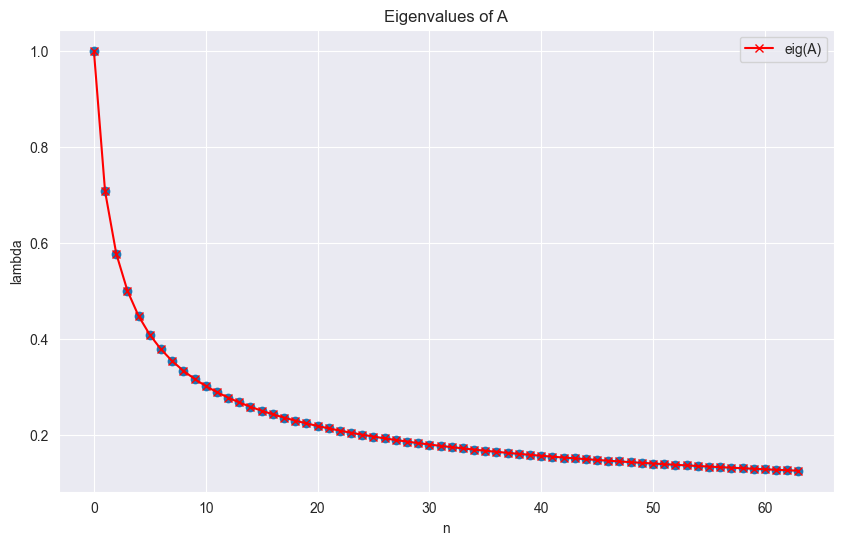

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(range(0,n), lambda_A, 'x-', color='r', label='eig(A)')
plt.scatter(range(0,n), lambda_A)
plt.title('Eigenvalues of A')
plt.xlabel('n')
plt.ylabel('lambda')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
def arnoldi_iteration(A, b, k):
    n = A.shape[0]
    H = np.zeros((k + 1, k))
    Q = np.zeros((n, k + 1))
    Q[:, 0] = b / np.linalg.norm(b)

    for j in range(k):
        v = A @ Q[:, j]
        for i in range(j + 1):
            H[i, j] = np.dot(Q[:, i].conj().T, v)
            v = v - H[i, j] * Q[:, i]
        H[j + 1, j] = np.linalg.norm(v)
        if H[j + 1, j] != 0 and j + 1 < k:
            Q[:, j + 1] = v / H[j + 1, j]

    return H, Q

In [36]:
b = np.random.rand(n)
k = 20

In [37]:
H, Q = arnoldi_iteration(A, b, k)

In [38]:
ritz_values = np.linalg.eigvals(H[:k, :k])

ritz_values

array([1.        +0.j        , 0.70710565+0.j        ,
       0.58073686+0.j        , 0.47080311+0.12080732j,
       0.47080311-0.12080732j, 0.52913691+0.04985884j,
       0.52913691-0.04985884j, 0.49209341+0.j        ,
       0.34483566+0.17858583j, 0.34483566-0.17858583j,
       0.21322455+0.18282152j, 0.21322455-0.18282152j,
       0.25793324+0.j        , 0.03151177+0.04777592j,
       0.03151177-0.04777592j, 0.06288392+0.j        ,
       0.06973701+0.11864241j, 0.06973701-0.11864241j,
       0.10195504+0.16028985j, 0.10195504-0.16028985j])

C:\Users\alepa\PycharmProjects\pythonProject\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\alepa\PycharmProjects\pythonProject\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\alepa\PycharmProjects\pythonProject\.venv\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


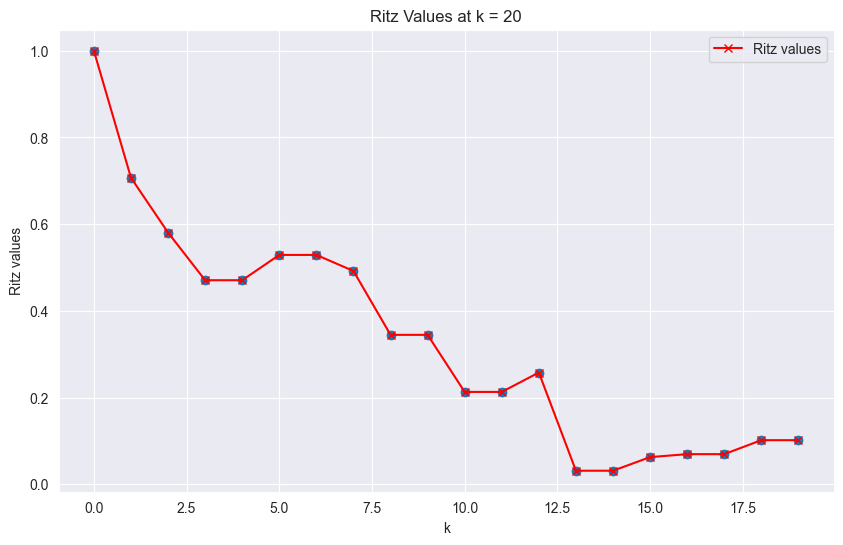

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(range(0,k), ritz_values, 'x-', color='r', label='Ritz values')
plt.scatter(range(0,k), ritz_values)
plt.title(f'Ritz Values at k = {k}')
plt.xlabel('k')
plt.ylabel('Ritz values')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
largest_eigenvalues = np.sort(np.abs(lambda_A))[-3:]

largest_eigenvalues

array([0.57735027, 0.70710678, 1.        ])

In [41]:
convergence_rates = {i: [] for i in range(3)}
iteration_steps = list(range(1, 21))

for k in iteration_steps:
    H, Q = arnoldi_iteration(A, b, k)
    ritz_values = np.linalg.eigvals(H[:k, :k])
    sorted_ritz_values = np.sort(np.abs(ritz_values))
    for i in range(3):
        if i < len(sorted_ritz_values):
            convergence_rates[i].append(sorted_ritz_values[-(i+1)])
        else:
            convergence_rates[i].append(np.nan)

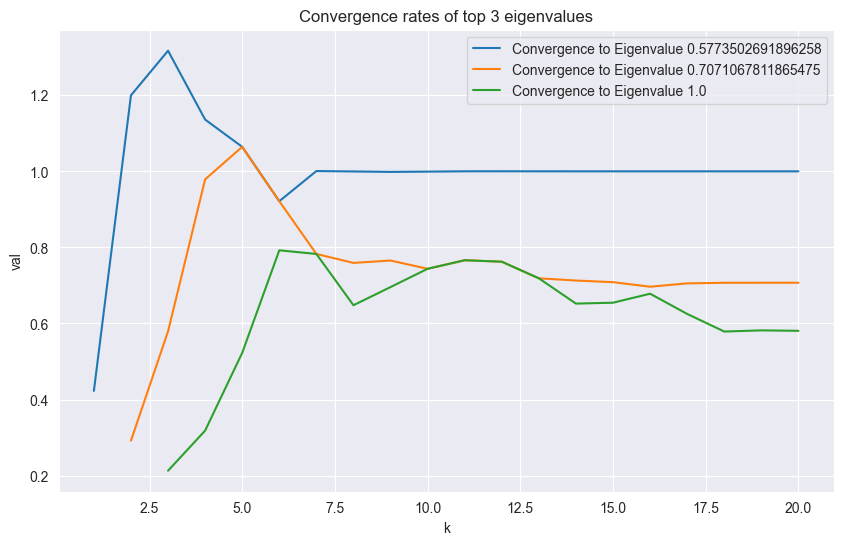

In [42]:
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(iteration_steps, convergence_rates[i], label=f'Convergence to Eigenvalue {largest_eigenvalues[i]}')
plt.title('Convergence rates of top 3 eigenvalues')
plt.xlabel('k')
plt.ylabel('val')
plt.legend()
plt.grid(True)
plt.show()